<center><h1>Résolution numérique des équations de Prandtl - Blasius</h1></center>

Voir sur [Jupyter Notebook Viewer](http://nbviewer.ipython.org/github/mgulina/Blasius/blob/master/Blasius.ipynb)

## Contenu

[Avant-propos](#Avant-propos)

[1 - Un soupçon de théorie](#1---Un-soup%C3%A7on-de-th%C3%A9orie)

 &emsp; [1.1 - Calcul de la couche limite](#1.1---Calcul-de-la-couche-limite)
    
&emsp; &emsp; <a href="#1.1.1---Formulation-de-Prandtl-(1875---1953)-en-%C3%A9quations-aux-d%C3%A9riv%C3%A9es-partielles">1.1.1 - Formulation de Prandtl (1875 - 1953) en équations aux dérivées partielles</a>
       
&emsp; &emsp; <a href="#1.1.2---Formulation-de-Blasius-(1883---1970)-en-%C3%A9quation-diff%C3%A9rentielle-ordinaire">1.1.2 - Formulation de Blasius (1883 - 1970) en équation différentielle ordinaire</a>
       
&emsp; [1.2 - Méthodes de résolution numérique](#1.2---M%C3%A9thodes-de-r%C3%A9solution-num%C3%A9rique)
    
&emsp; &emsp; [1.2.1 - Différences finies](#1.2.1---Diff%C3%A9rences-finies)
       
&emsp; &emsp; [1.2.2 - Intégration numérique](#1.2.2---Int%C3%A9gration-num%C3%A9rique)
       
&emsp; &emsp; [1.2.3 - Méthode du tir](#1.2.3---M%C3%A9thode-du-tir)

[2 -  Résolution numérique](#2---Résolution-numérique)

&emsp; [2.1 - Intégration numérique du problème de Blasius](#2.1---Int%C3%A9gration-num%C3%A9rique-du-probl%C3%A8me-de-Blasius)
    
&emsp; [2.2 - Différences finies appliquées aux équations de Prandtl](#2.2---Diff%C3%A9rences-finies-appliqu%C3%A9es-aux-%C3%A9quations-de-Prandtl)

&emsp; &emsp; [2.2.1 - Rappel des équations de Prandtl](#2.2.1---Rappel-des-équations-de-Prandtl)

&emsp; &emsp; [2.2.1 - Schéma numérique utilisé](#2.2.2---Schéma-numérique-utilisé)

&emsp; &emsp; [2.2.3 - Critère de convergence](#2.2.3---Crit%C3%A8re-de-convergence)
    
[Conclusions](#Conclusions)

[Références](#Références)

## Avant-propos

Comprendre la Nature… Ces trois mots incarnent la pensée du Physicien. Dans ce but, il commence par étudier le solide, objet insensible aux déformations de par sa nature. Cette insensibilité lui confère une certaine simplicité dans sa description. En Dynamique des Fluides, on étudiera des objets de nature autrement plus complexe : tantôt calmes et tranquilles, tantôt impétueux et tumultueux, les fluides, quant à eux, ont beaucoup de choses à nous dire ! La simplicité du solide n’est plus ; ce sont des équations aux dérivées partielles non linéaires qui régissent le mouvement des fluides « newtoniens » comme milieux continus. Elles furent écrites par Navier et Stokes dans le courant du $XIX^e$ siècle et prennent, si l’on suppose l’incompressibilité, la forme analytique suivante :

$$
   \rho \left[ \frac{\partial \vec{u}}{\partial t}  + \left( \vec{u} \cdot \vec{\nabla} \right) \vec{u} \right] =  - \vec{\nabla}P + \mu \Delta \vec{u} + \vec{f}_{ext}
$$

De nombreux artistes de la Science ont contribué à la résolution de ces équations dans différents cas particuliers. Nous étudions ici l'un de ces cas : le calcul de la couche limite sur une plaque plane. Partant des équations de Navier-Stokes, Prandtl trouva des équations aux dérivées partielles. C'est alors que Blasius, étudiant de Prandtl, proposa une formulation plus esthétique en une équation différentielle ordinaire...

## 1 - Un soupçon de théorie
<div align="right">
     <i>
         « Ce que l'on conçoit bien s'énonce clairement,
         <br />
         et les mots pour le dire arrivent aisément. »
     </i>
     <br />
     Nicolas Boileau, <i>L'Art poétique</i> (1674)
 </div>

### 1.1 - Calcul de la couche limite

Nous traitons ici le problème de la couche limite dans le cas le plus simple d'une plaque plane. Ce que l'on appel couche limite est la zone interfaciale entre la plaque et le fluide dans laquelle la viscosité de fluide agira de manière dominante sur l'écoulement.

Considérons une plaque plane et modélisons-la par le demi-plan infini généré par les axes orthogonaux habituels $x$ et $z$ de sorte qu'il soit dans la partie positive de $x$. Le $3^{ème}$ axe, $y$, pointe donc vers le haut, perpendiculairement à ce plan.

Ajoutons maintenant les vents, soufflant à la vitesse $\vec{U}$ dans la direction $x$. Une fois arrivé dans la partie positive de l'axe, la vitesse du fluide subira l'influence de la plaque et on la notera $\vec{u} = \left( u_x(t,x,y),u_y(t,x,y) \right)$ où l'on peut se passer de la dépendance en $z$ par symétrie de translation.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 1.1.1 - Formulation de Prandtl (1875 - 1953) en équations aux dérivées partielles

__*Analyse de l'équation pour $u_x$*__

Écrivons l'équation de Navier-Stokes projetée sur $x$ en divisant les deux membres par $\rho$ pour avoir, sachant que $\nu = \mu/\rho$ : 

$$
  \frac{\partial u_x}{\partial t}  + u_x\frac{\partial u_x}{\partial x} + u_y\frac{\partial u_x}{\partial y} =  
  -  \frac{1}{\rho}\frac{\partial P}{\partial x} + \nu \frac{\partial^2 u_x }{\partial x^2} + \nu \frac{\partial^2 u_x }{\partial y^2} 
$$

Compte tenu de la géométrie du problème, on peut supposer que :

$$ \left\{ \;    
\begin{array}{lcl}
\left| \partial_x u_x \right|    & << & \left| \partial_y u_x \right| \\ 
\left| \partial_x^2 u_x \right|  & << & \left| \partial_y^2 u_x \right| \\ 
\end{array} 
\right.
$$

De plus, il n'y a pas de forces extérieures. Ces affirmations rendent licite l'écriture suivante pour la composante $u_x$ :

$$
  \frac{\partial u_x}{\partial t}  + u_x\frac{\partial u_x}{\partial x} + u_y\frac{\partial u_x}{\partial y} =
  - \frac{1}{\rho}\frac{\partial P}{\partial x} + \nu \frac{\partial^2 u_x }{\partial y^2} 
$$

Où l'on a pu négliger l'un des termes du laplacien. Il est important de remarquer que l'on n'a pas simplifié les dérivées premières malgré la tentation. En effet, en regardant attentivement on s'aperçoit que la pondération résultante de l'opérateur $\vec{u} \cdot \vec{\nabla}$ confère à ces deux termes un même ordre de grandeur. L'incompressibilité force l'écoulement à être solénoïdal. Ceci s'exprime comme :

$$
\vec{\nabla} \cdot \vec{u} = 0
$$

Si on pose $L$ comme la distance caractéristique dans la direction $x$ et $\delta$  l'analogue pour la direction $y$, on peut écrire cette contrainte de manière dimensionnelle :

$$
\frac{u_x}{L} \sim \frac{u_y}{\delta}
$$

Il s'en suit les égalités ci-dessous :

$$ \left\{ \;    
\begin{array}{lclcl}
\left| u_x \partial_x u_x \right| & \sim & U^2/L       &      &         \\ 
\left| u_y \partial_y u_x \right| & \sim & u_yu_x/\delta & \sim & U^2/L \\ 
\end{array} 
\right.
$$

__*Expression de $\delta$*__

À la limite où l'on a égalité des contributions du terme non linéaire et du terme visqueux, il vient :

$$
 \frac{U^2}{L} \sim \nu \frac{U}{\delta^2} \Longrightarrow \delta \sim \frac{L}{\sqrt{Re}}
$$

En utilisant la définition du nombre de Reynolds $Re = UL/\nu$. On appelle couche limite, la zone en contact avec la plaque et d'épaisseur $\delta$. C'est dans cette couche que les effets visqueux dominent.

__*Analyse de l'équation pour $u_y$*__

Exploitons maintenant l'équation pour $u_y$. Celle-ci s'écrit comme :

$$
  \frac{\partial u_y}{\partial t}  + u_x\frac{\partial u_y}{\partial x} + u_y\frac{\partial u_y}{\partial y} =
  - \frac{1}{\rho}\frac{\partial P}{\partial y} + \nu \frac{\partial^2 u_y }{\partial x^2} + \nu \frac{\partial^2 u_y }{\partial y^2} 
$$

L'analyse dimensionnelle fournit les relations suivantes, avec $T \sim L/u_x$ :

$$ \left\{ \;    
\begin{array}{lclcl}
\left| \partial_t u_y \right|       & \sim & u_x\delta/LT                            & \sim & \delta U^2/L^2    \\ 
\left| u_x \partial_x u_y \right|   & \sim & u_x u_y/L                               & \sim & \delta U^2/L^2    \\
\left| u_y \partial_y u_y \right|   & \sim & u_y^2/\delta                            & \sim & \delta U^2/L^2    \\
\left| \nu \partial_x^2 u_y \right| & \sim & \frac{\nu}{L^2}     \frac{u_x\delta}{L} & \sim & \delta^3 U^2/L^4  \\
\left| \nu \partial_y^2 u_y \right| & \sim & \frac{\nu}{\delta^2}\frac{u_x\delta}{L} & \sim & \delta U^2/L^2    \\
\end{array} 
\right.
$$

Par compatibilité, on a : $\left| \partial_y P \right| \sim \rho \delta U^2/L^2$. À grand nombre de Reynolds, on ne conserve que les termes en $\mathcal{O}(\delta) = 0$. De cette équation on tire finalement que $p = p(x)$. 

__*Équation pour la pression*__

On prend alors pour $p(x)$, la pression sur le bord de la couche limite. On l'obtient en solutionnant l'équation de Navier-Stokes dans la zone libre de viscosité : 

$$
  \frac{\partial u_x}{\partial t}  + u_x\frac{\partial u_x}{\partial x} = - \frac{1}{\rho}\frac{dP}{dx}
$$


__*Hypothèse de stationnarité*__

Supposons maintenant que $\partial_t u_x = 0 = \partial_t u_y$. L'équation pour la pression se réduit comme : 

$$
  -\frac{1}{\rho}\frac{dP}{dx} = u_x\frac{\partial u_x}{\partial x} = 0
$$

Car, loin de la plaque $u_x \to U \Longrightarrow \partial_x u_x = 0$. Ceci simplifie les équations de Prandtl :

$$
\left\{ \; 
\begin{array}{lclcl}
   u_x \frac{\partial u_x}{\partial x} + u_y \frac{\partial u_x}{\partial y} = \nu \frac{\partial^2 u_x}{\partial y^2}\\
   u_x \frac{\partial u_y}{\partial x} + u_y \frac{\partial u_y}{\partial y} = \nu \frac{\partial^2 u_y}{\partial x^2}
\end{array} 
\right.   
$$

__*Équations de Prandtl*__

Finalement, le système complet des équations de Prandtl à l'ordre $0$ en $\delta$ est donné par :

$$ \left\{ \;    
\begin{array}{l} 
\vec{\nabla} \cdot \vec{u} = 0   \\
u_x \frac{\partial u_x}{\partial x} + u_y \frac{\partial u_x}{\partial y} = \nu \frac{\partial^2 u_x}{\partial y^2}  \\
\end{array} 
\right.
$$

avec les conditions limites suivantes : 

<table width='50%' border='0'>
  <tr>
    <td><div align='right'>Non glissement</div></td>
    <td>$u_x(x,0) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Flux entrant uniforme</div></td>
    <td>$u_x(0,y) = U$ et $u_y(0,y) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Imperméabilité de la plaque</div></td>
    <td>$u_y(x,0) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Vitesse uniforme à l'infini</div></td>
    <td>$\vec{u}(x,y \to \infty) \to (U,0)$</td>
  </tr>
</table>

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 1.1.2 - Formulation de Blasius (1883 - 1970) en équation différentielle ordinaire

__*Fonction de courant*__

Utilisons le formalisme de la fonction de courant que l'on note $\psi(x,y)$ : 

$$ \left\{ \;    
\begin{array}{l} 
u_x =  \partial_y \psi \\
u_y = - \partial_x \psi  \\
\end{array} 
\right.
$$

Injectons ceci dans l'équation de Prandtl pour obtenir : 

$$
\frac{\partial \psi}{\partial y} \frac{\partial^2 \psi}{\partial x \partial y}
- \frac{\partial \psi}{\partial x} \frac{\partial^2 \psi}{\partial y^2}
= \nu \frac{\partial^3 \psi}{\partial y^3}
$$

__*Équation de Blasius*__

Exprimons maintenant le génie de Blasius en posant la forme de la fonction de courant comme :

$$
 \psi = \sqrt{\nu U x} \; f(\eta) \; ; \; \eta(x,y) = \sqrt{\frac{U}{\nu}}\frac{y}{\sqrt{x}} 
$$

En effet, il avait remarqué que l'épaisseur de la couche limite devait augmenter de manière moins que linéaire et que le profil se modifiait en dilatant continûment sa courbure ($\eta$ indépendant de $L$). Examinons la nouvelle forme des dérivées partielles :

$$
\left\{ \;    
\begin{array}{lllcl}
\partial_x  =  \frac{\partial \eta}{\partial x} \partial_\eta
 = - \frac{1}{2} \frac{\eta}{x} \partial_\eta
 & \Longrightarrow u_y = & - \partial_x \psi 
 & = & \frac{1}{2} \sqrt{\frac{\nu U}{x}}\left( \eta f' - f \right)\\
\partial_y  =  \frac{\partial \eta}{\partial y} \partial_\eta
 = \sqrt{\frac{U}{\nu x}} \partial_\eta
 & \Longrightarrow u_x = & \partial_y \psi & = & U f'\\
\end{array}
\right.
$$

L'équation pour $\psi$ se transforme en :

$$
U f' \left( U f'' \left(- \frac{x}{2x}\right) \right)
+ \frac{1}{2}\sqrt{\frac{\nu U}{x}}\left( \eta f' - f \right) U f'' \sqrt{\frac{U}{\nu x}}
= \nu \frac{U^2}{\nu x} f'''
$$

Après simplifications, on a l'équation de Blasius :

$$
   f^{'''} + \frac{1}{2}ff^{''} = 0
$$

avec les conditions limites suivantes : 
 
$$ \left\{ \;    
\begin{array}{lcl}
f(0) & = & 0 \\ 
f'(0) & = & 0 \\ 
f''(0) & = & ? \; \Longrightarrow \; f'(\infty) & = & 1 \\ 
\end{array}
\right.$$

Car on a supposé le non-glissement et le caractère uniforme de la vitesse loin de la plaque.

__*Comportement de l'écoulement près de la plaque*__

Pour les petites valeurs de $\eta$, on peut développer $f'$ en série de Taylor autour de $0$ comme : 

$$
f'(\eta) = f'(0) + \eta f''(0) + \mathcal{O}(\eta^2)
$$

Comtpe tenu des conditions initiales cette expression se réduit à : 

$$
f'(\eta) = \eta f''(0) + \mathcal{O}(\eta^2)
$$

Nous aurons l'occasion de vérifier ce comportement plus loin.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

### 1.2 - Méthodes de résolution numérique

Il arrive souvent en physique que des équations ne peuvent être solutionnées analytiquement. Les fameuses équations de Navier-Stokes en donne un bel exemple. Le problème que nous avons à résoudre en découle et peut s’écrire sous deux formes analytiques équivalentes. Celles-ci sont propices à l’utilisation de méthodes numériques différentes (la méthode des différences finies et l’intégration numérique) de sorte que nous puissions, à la fin, les comparer.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 1.2.1 - Différences finies

La méthode des différences finies est très intuitive. Elle est basée sur la définition de la dérivée d'une fonction (que l'on suppose, bien entendu, suffisamment lisse) : 

$$
    f'(x) = \lim_{\Delta x \, \to \, 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

On construit une grille de pas $h$ et on approxime ainsi la dérivée de la fonction à l'aide du nœud de la grille suivant : 

$$
    f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

C'est la formule d'Euler progressive. Si on exploite le nœud précédent, on obtient la formule d'Euler rétrograde : 

$$
    f'(x) \approx \frac{f(x) - f(x - h)}{h}
$$

Afin de gagner en précision, on peut utiliser les deux informations en les sommant pour avoir la différence centrée : 

$$
    f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

L'article de B. Fornberg fournit les coefficients à utiliser pour les dérivées d'ordre supérieur (jusque 4) ainsi que pour des niveaux plus fin de précision.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 1.2.2 - Intégration numérique

Considérons le problème de Cauchy suivant : 

$$ \left\{ \;
\begin{array}{lcl}
y'(x) & = & f(x,y(x)) \\ 
y(x_0) & = & y_0 \\ 
\end{array} 
\right.$$

De nouveau, on suppose la fonction $y$ suffisamment lisse sur l'intervalle $I$ que parcours $x$. Dès lors, on peut montrer l'existence et l'unicité d'une solution locale. Celle-ci s'écrira formellement comme : 

$$
y(x) = y_0 + \int\limits_{x_0}^{x} f(x',y(x')) dx'
$$

Maintenant, on discrétise l'intervalle d'intégration par un pas $h$ tel que : 

$$
x_n = x_0 + nh  \; ; \; n \in \left\{ 0, 1, \cdots, N \right\} \subset \mathbb{N}
$$

On définit alors pour chacun de ces nœuds :

$$
y_n = y(x_n) \; ; \; f_n = f(x_n, y_n)
$$

Ceci permet de construire une schéma d'intégration générique calculant successivement $y_n$ en chaque nœud depuis la condition initiale connue : 

$$
y_{n+1} = y_n + hF(x_i, y_i, f_i; h)
$$

Où $F$ est la fonction d'incrément caractérisant le schéma d'intégration utilisé.

Notons que l'intégration numérique est assujettie aux conditions initiales. Pour l'équation de Blasius, nous n'en avons que deux sur trois. Cependant, on a tout de même une condition supplémentaire qui peut être exploitée afin de pouvoir utiliser l'intégration numérique, il faudra donc passer par la méthode du tir.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 1.2.3 - Méthode du tir

Si l'on a une condition limite qui n'est pas fixée à l'origine, en vertu du paragraphe précédent, on voit que l'intégration numérique ne peut pas s'enclencher. Par exemple, considérons un système de trois équations différentielles ordinaires pour $f_1$, $f_2$ et $f_3$ tel que l'on ait :

$$ \left\{ \;
\begin{array}{lcl}
f_1(t_0) & = & f_{10} \\ 
f_2(t_0) & = & f_{20} \\ 
f_3(\tau) & = & f_{3\tau} \\ 
\end{array} 
\right.$$
    
On construit alors un algorithme qui va essayer différentes conditions initiales pour $f_3$ jusqu'à en trouver une telle que l'on ait $f_3(\tau) = f_{3\tau}$.  Cette idée d'essayer différentes conditions initiales fait penser à des tirs successifs, d'où le nom de méthode du tir.

Afin de trouver la bonne condition initiale, l'agorithme interpole linéairement les deux dernières valeurs de $f_3(\tau)$ afin de trouver une approximation de la condition initiale fournissant l'égalité $f_3(\tau) = f_{3\tau}$ qui permettra l'évaluation de l'itération suivante.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

## 2 - Résolution numérique

La théorie est maintenant posée, venons-en à la résolution numérique de ces équations.

Dans un premier temps, on intègre numériquement l'équation de Blasius en appliquant la méthode du tir sur la troisième condition initiale. Ensuite, on s'attaque aux équations de Prandtl par la méthodes des différences finies. 

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

### 2.1 - Intégration numérique du problème de Blasius

On commence par transformer l'équation de Blasius, qui est une équation différentielle ordinaire du $3^{ème}$ ordre, en un système de trois équations différentielles ordinaires du $1^{er}$ ordre :

$$ \left\{ \;
\begin{array}{lclc}
g_1 & = & f   &                 \\ 
g_2 & = & f'  & \Longrightarrow \\ 
g_3 & = & f'' &                 \\ 
\end{array}
\right.
\left\{ \;
\begin{array}{lcl}
g_1' & = & g_2 \\ 
g_2' & = & g_3 \\ 
g_3' & = & -\frac{1}{2} g_1 g_3 \\ 
\end{array}
\right.
$$

Où l'on a explicitement utilisé l'équation de Blasius pour $g_3'$.

On exprime les conditions limites en termes des $g_1$, $g_2$ et $g_3$ :


$$ \left\{ \;    
\begin{array}{lcl}
g_1(0) & = & 0 \\ 
g_2(0) & = & 0 \\ 
\lim\limits_{\eta \to + \infty} g_2(\eta) & = & 1 \\ 
\end{array} 
\right.$$


Il faut modifier la $3^{ème}$condition afin de l'exprimer comme une condition initiale de $g_3$ tout en ayant $\lim\limits_{\eta \to + \infty} g_2(\eta) = 1$.

Ci-dessous, l'intégrateur numérique (en *Python*) résout le système d'équations pour un triplet de conditions initiales données par l'utilisateur. La méthode du tir trouve assez rapidement la condition manquante : $g_3(\eta = 0) \approx \frac{1}{3}$.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

g_2(inf) :  1.00001
g_3(0) :  0.331311
Pas d'intégration :  0.01
Nombre de points :  1001
Nombre d'itérations :  11
Durée de l'intégration en secondes :  1.5312602519989014


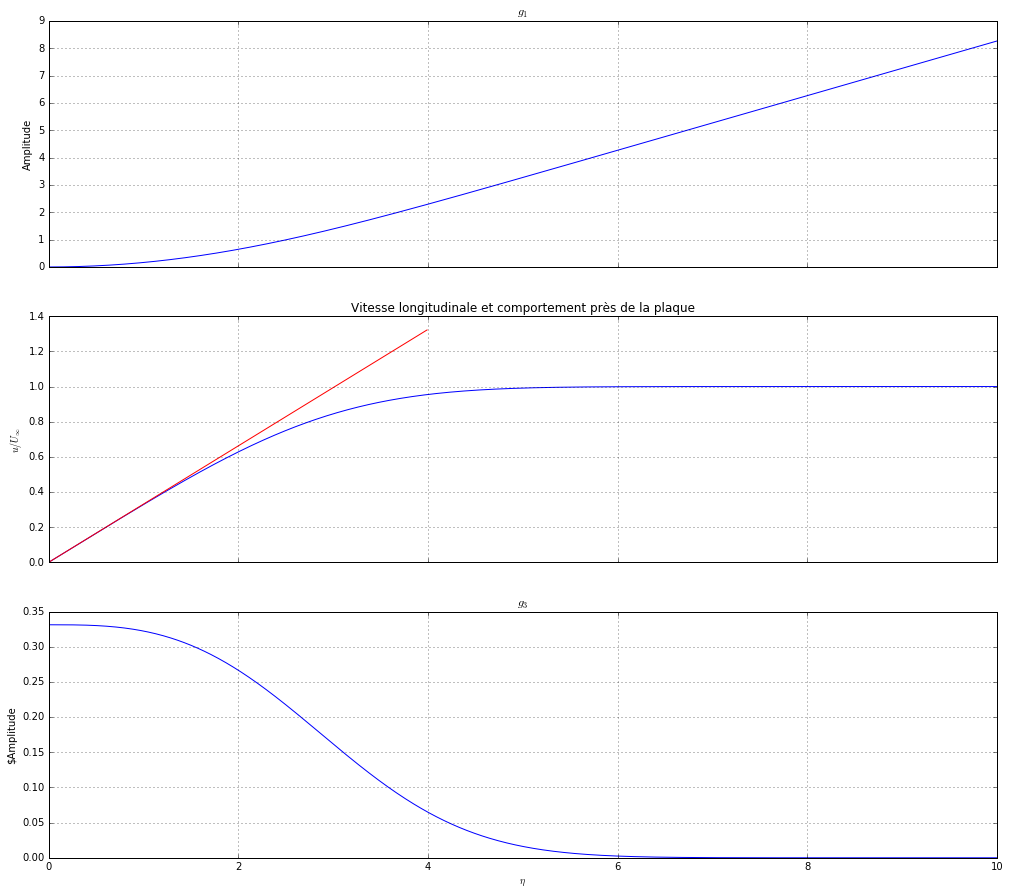

In [25]:
# Librairies
import numpy as np
from math import sqrt, floor
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import time  

#################################################################

# ----------------------------------------------------------------
# 1 - Intégrateur Runge-Kutta d'ordre 4 pour le système de Blasius
# ----------------------------------------------------------------

# Arguments :
# -----------

    # m               : Nombre de points d'intégration
    # x_min et x_max  : Intervalle d'intégration
    # CIg3            : Condition initiale pour g_3(eta) = f'''(eta)

# Plan
# ----

# 1.1 - Initialisation
    # 1.1.1 - Système d'équations
    # 1.1.2 - Pas d'intégration
    # 1.1.3 - Déclaration des points d'intégration
    # 1.1.4 - Exploitation de la condition initiale non nulle

# 1.2 - Intégration par RK4
    # 1.2.1 - Stockage provisoire des g
    # 1.2.2 - Calcul des termes du schéma RK4
    # 1.2.3 - Addition des termes avec la pondération du schéma RK4

# ----------------------------------------------------------------    
    
def RK4_Blasius(m, x_min, x_max, CIg3) :
    # 1.1 - Initialisation
    
    # 1.1.1 - Système d'équations
    eqn1 = 'Y2'
    eqn2 = 'Y3'
    eqn3 = '-0.5*Y1*Y3'
    
    # 1.1.2 - Pas d'intégration
    h = (x_max - x_min)/m
    
    # 1.1.3 - Déclaration des points d'intégration
    g1 = np.zeros(m, dtype='f')
    g2 = np.zeros(m, dtype='f')
    g3 = np.zeros(m, dtype='f')

    # 1.1.4 - Exploitation de la condition initiale non nulle
    g3[0] = CIg3
        
    # 1.2 - Intégration par RK4
    
    for i in range(0,m-1) : # i va de 0 à m-2

        # 1.2.1 - Stockage provisoire des g
        YY1 = g1[i]
        YY2 = g2[i]
        YY3 = g3[i]

        Y1 = YY1
        Y2 = YY2
        Y3 = YY3

        # 1.2.2 - Calcul des termes du schéma RK4
        
        ## Terme K1
        k11 = h*eval(eqn1)
        k12 = h*eval(eqn2)
        k13 = h*eval(eqn3)
        
        ## Terme K2
        
        Y1 = YY1 + (k11/2.)
        k21 = h*eval(eqn1)   
        
        Y2 = YY2 + (k12/2.)
        k22 = h*eval(eqn2)  
        
        Y3 = YY3 + (k13/2.)
        k23 = h*eval(eqn3)
        
        ## Terme K3
        Y1 = YY1 + (k21/2.)
        k31 = h*eval(eqn1)
        
        Y2 = YY2 + (k22/2.)
        k32 = h*eval(eqn2)
        
        Y3 = YY3 + (k23/2.)
        k33 = h*eval(eqn3)
        
        ## Terme K4
        Y1 = YY1 + k31
        k41 = h*eval(eqn1)
        
        Y2 = YY2 + k32
        k42 = h*eval(eqn2)
        
        Y3 = YY3 + k33
        k43 = h*eval(eqn3)

        # 1.2.3 - Addition des termes avec la pondération du schéma RK4
        g1[i+1] = g1[i] + (1./6.)*(k11 + 2.*k21 + 2.*k31 + k41)
        g2[i+1] = g2[i] + (1./6.)*(k12 + 2.*k22 + 2.*k32 + k42)
        g3[i+1] = g3[i] + (1./6.)*(k13 + 2.*k23 + 2.*k33 + k43)

    return np.transpose(np.array([g1, g2, g3]))

#############################################################

# -----------------------------------------------------------
# 2 - Intégration du système de Blasius par la méthode du tir
# -----------------------------------------------------------

# Plan
# ----

# 2.1 - Paramètrisation
    # 2.1.1 - Définition des vecteurs y et eta
    # 2.1.2 - Tolérance sur la valeur de g_2 en etamax
    # 2.1.3 - Tests initiaux pour la méthode du tir
    # 2.1.4 - Viscosité dynamique et vitesse à l'infini
    
# 2.2 - Intégration couplée au tir (g_1 = g[:,0], g_2 = g[:,1] et g_3 = g[:,2])
    # 2.2.1 - Initialisation
    # 2.2.2 - Premiers tirs
    # 2.2.3 - Boucle principale

# 2.3 - Approximation de g_2 pour les petites valeurs de eta (0 < eta <~ 4.)
    
# 2.4 - Sorties
    # 2.4.1 - Numériques    
    # 2.4.3 - Graphiques
    
# -----------------------------------------------------------    
    
# 2.1 - Paramètrisation
# 2.1.1 - Définition des vecteurs y et eta
xmax = 200      # Modifiable (par défaut 200)
ymax = 100      # Modifiable (par défaut 100)

n = 3            # Modifiable (par défaut 3)
m = 10**n + 1

y = np.linspace(0., ymax, m)
eta = y/sqrt(xmax/2)
etamax = eta[m-1]

Infty = m - 1

# 2.1.2 - Tolérance sur la valeur de g_2 en etamax
tol = 10**(-5) # Modifiable (par défaut 10**(-5))

# 2.1.3 - Tests initiaux pour la méthode du tir
TestB = 0     # B pour Bas. Modifiable (par défaut 0) 
TestH = 2     # H pour Haut. Modifiable (par défaut 2) 

# 2.1.4 - Viscosité dynamique et vitesse à l'infini (facultatif : demande l'ajout des facteurs dimensionnels plus bas)
nu = 10**(-5)      # Modifiable (par défaut 10**(-5) m²/s)
U = 10             # Modifiable (par défaut 10 m/s)
     
# 2.2 - Intégration couplée au tir (g_1 = g[:,0], g_2 = g[:,1] et g_3 = g[:,2])
# 2.2.1 - Initialisation
start_time = time.time() # tic

CIB = np.array([0.,0.,TestB])
CIH = np.array([0.,0.,TestH])

def Blasius(CondInit, t):
    g1 = CondInit[1]
    g2 = CondInit[2]
    g3 = -0.5*CondInit[0]*CondInit[2]
    return np.array([g1, g2, g3])

# 2.2.2 - Premiers tirs
gB = RK4_Blasius(m, 0, etamax, CIB[2])
# gB = odeint(Blasius, CIB, eta)

gH = RK4_Blasius(m, 0, etamax, CIH[2])
# gH = odeint(Blasius, CIH, eta)

gBinf = gB[Infty,1] # Valeur de gB "à l'infini"
gHinf = gH[Infty,1] # Valeur de gH "à l'infini"

# 2.2.3 - Boucle principale de la méthode du tir
cpt = 0 # Compteur d'itération
Erreur  = 1. # Condition d'enclenchement de la boucle
while abs(Erreur) > tol:    
    ## Interpolation linéaire : y = ax + b => a = Delta_y / Delta_x ; b = y - ax
    a = (gHinf - gBinf)/(CIH[2] - CIB[2])             # Pente de la droite joignant (CIB, gBinf) à (CIH, gHinf)
    b = 0.5*((gBinf - a*CIB[2]) + (gHinf - a*CIH[2])) # Moyenne pour b sur les 2 points (CIB, gBinf) et (CIH, gHinf)
    
    ## Nouvelle condition initiale : x = (y - b)/a
    CI = np.array([0.,0.,(1 - b)/a])
    
    ## Intégration du système
    g =  RK4_Blasius(m, 0., etamax, CI[2])
    # g  odeint(Blasius, CI, eta)
    
    ## Itération suivante
    Erreur = g[Infty,1] - 1
    
    if Erreur > 0 :        # On a tiré trop haut
        gHinf = g[Infty,1]
        CIH[2] = CI[2]
    else :                 # On a tiré trop bas
        gBinf = g[Infty,1]
        CIB[2] = CI[2]
        
    cpt += 1

DureeTotale = time.time() - start_time  # toc 

# 2.3 - Approximation de g_2 pour les petites valeurs de eta (0 < eta <~ 4.)
x = eta[0:floor(m*4/(etamax - 0))] # Permet d'aller jusque eta =~ 4.

# 2.4 - Sorties
# 2.4.1 - Numériques
print('g_2(inf) : ', g[m-1,1]) # facteur dimensionnel : U* 
print('g_3(0) : ', g[0,2])     # facteur dimensionnel : U* 
print('Pas d\'intégration : ', etamax/(m-1))
print('Nombre de points : ', m)
print('Nombre d\'itérations : ', cpt)
print('Durée de l\'intégration en secondes : ', DureeTotale)

# 2.4.2 - Graphiques
figtir, axestir = plt.subplots(3, sharex = True, figsize=(17,15))

# g_1
axestir[0].plot(eta, g[:,0])
axestir[0].set_ylabel('Amplitude')
axestir[0].set_title('$g_1$')
axestir[0].xaxis.grid(True,'major')
axestir[0].yaxis.grid(True,'major')

# u
axestir[1].plot(eta, g[:,1]) # facteur dimensionnel : U* 
axestir[1].set_ylabel('$u/U_\infty$')
axestir[1].set_title('Vitesse longitudinale et comportement près de la plaque')
axestir[1].xaxis.grid(True,'major')
axestir[1].yaxis.grid(True,'major')

# g_3
axestir[2].plot(eta, g[:,2])
axestir[2].set_title('$g_3$')
axestir[2].xaxis.grid(True,'major')
axestir[2].yaxis.grid(True,'major')
axestir[2].set_xlabel('$\eta$')
axestir[2].set_ylabel('$Amplitude')

# Comportement à l'origine
axestir[1].plot(x, x*g[0,2],'r') # facteur dimensionnel : U*

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

### 2.2 - Différences finies appliquées aux équations de Prandtl

#### 2.2.1 - Rappel des équations de Prandtl
Nous attaquons maintenant le système d'équations de Prandtl par la méthode des différences finies. Commençons par reprendre le système :

$$ \left\{ \;    
\begin{array}{l} 
\vec{\nabla} \cdot \vec{u} = 0   \\
u_x \frac{\partial u_x}{\partial x} + u_y \frac{\partial u_x}{\partial y} = \nu \frac{\partial^2 u_x}{\partial y^2}  \\
\end{array} 
\right.
$$

avec les conditions limites : 

<table width='50%' border='0'>
  <tr>
    <td><div align='right'>Non glissement</div></td>
    <td>$u_x(x,0) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Flux entrant uniforme</div></td>
    <td>$u_x(0,y) = U$ et $u_y(0,y) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Imperméabilité de la plaque</div></td>
    <td>$u_y(x,0) = 0$</td>
  </tr>
  <tr>
    <td><div align='right'>Vitesse uniforme à l'infini</div></td>
    <td>$\vec{u}(x,y \to \infty) \to (U,0)$</td>
  </tr>
</table>

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 2.2.2 - Schéma numérique utilisé
Discrétisons le plan $(x,y)$ en construisant une grille dont le pas dans la direction $x$ est $h_x$ et de la même manière, $h_y$ sera le pas dans la direction $y$. On associe ensuite l'indice $i$ à l'abscisse et l'indice $j$ à l'ordonnée d'un noeud. Sur ces considérations, on peut écrire les différences centrées suivantes :

$$
\left( \frac{\partial u_x}{\partial y} \right)_{i,j} \approx \frac{u_x(i,j+1) - u_x(i,j-1)}{2 h_y} \\
\left( \frac{\partial^2 u_x}{\partial y^2} \right)_{i,j} \approx \frac{u_x(i,j+1) - 2u_x(i,j) + u_x(i,j-1)}{h_y^2}
$$

Où $u_x(i,j)$ est la valeur de $u_x$ au noeud $(i,j)$. La dérivée partielle dans la direction $x$ sera approchée par l'expression progressive suivante :

$$
\left( \frac{\partial u_x}{\partial x} \right)_{i,j} \approx \frac{u_x(i+1,j) - u_x(i,j)}{h_x} \\
$$

En substituant ces expressions dans le bilan d'impulsion on obtient la valeur de $u_x(i+1,j)$ comme suit :

$$
u_x(i+1,j) = u_x(i,j) + \nu \frac{u_x(i,j+1) - 2u_x(i,j) + u_x(i,j-1)}{u_x(i,j)} \frac{h_x}{h_y^2} - \frac{u_x(i,j+1) - u_x(i,j-1)}{2}\frac{u_y(i,j)}{u_x(i,j)}\frac{h_x}{h_y} 
$$

Connaissant $u_x(i+1,j)$ on obtient $u_y(i+1,j)$ via l'équation de continuité. Pour cela, on utilise d'une part la différence rétrograde en $y$ au noeud $(i+1,j)$ :

$$
\left( \frac{\partial u_y}{\partial x} \right)_{i+1,j} \approx \frac{u_y(i+1,j) - u_y(i+1,j-1)}{h_y}
$$

et d'autre part l'expression suivante pour la dérivée en $x$ :

$$
\left( \frac{\partial u_x}{\partial x} \right)_{i+1,j} \approx \frac{1}{2} \left[ \frac{u_x(i+1,j) - u_x(i,j)}{h_x} \frac{u_x(i+1,j-1) - u_x(i,j-1)}{h_x}\right] \\
$$

On arrive alors à trouver $u_y(i+1,j)$ :

$$
u_y(i+1,j) = u_y(i+1,j-1) - \frac{1}{2} \left[ \frac{u_x(i+1,j) - u_x(i,j)}{h_x} \frac{u_x(i+1,j-1) - u_x(i,j-1)}{h_x}\right] h_y
$$

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

#### 2.2.3 - Critère de convergence
La convergence d'un schéma numérique est essentielle. On peut montrer que les pas de discrétisation ne sont pas indépendants et doivent vérifier la relation suivante afin d'assurer la convergence du schéma ci-dessus :

$$
h_x \leq \frac{h_y^2}{2\nu}u_x(i,j)
$$

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

Longueur (xmax) :  0.2 m
Pas sur x :  0.0001 m
Hauteur (ymax) :  0.0045 m
Pas sur y :  0.0001 m
Paramètre max (etamax) en x/2 :  10.0623
Durée de l'intégration en secondes :  1.2812433242797852


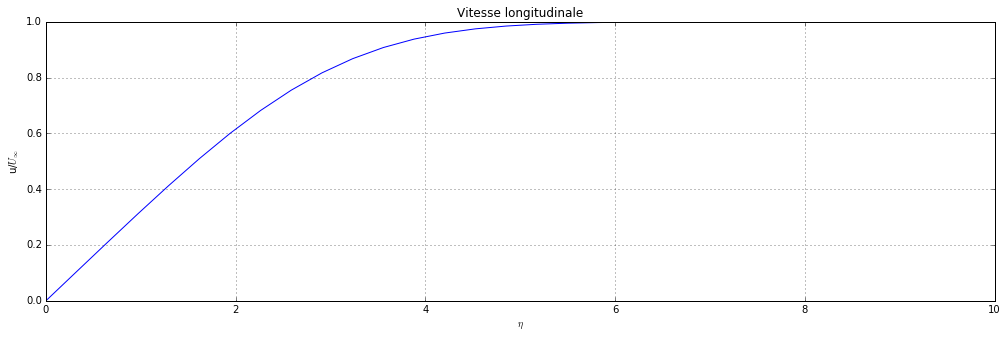

In [22]:
# Librairies
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import time


################################################################

# --------------------------------------------------------------
# 3 - Résolution des équations de Prandtl par différences finies
# --------------------------------------------------------------

# Plan
# ----

# 3.1 - Initialisation
# 3.1.1 - Paramètrisation de la méthode des différences finies 
# 3.1.2 - Paramètres physiques

# 3.2 - Résolution numérique
    # 3.2.1 - Initialisation 
    # 3.2.2 - Condition initiale non nulle
    # 3.2.3 - Différences finies : _i+1,j+1 = [j-1,i+1]
    
# 3.3 - Sorties
    # 3.3.1 - Numériques
    # 3.3.2 - Graphique

# --------------------------------------------------------------  

# 3.1 - Initialisation     
# 3.1.1 - Paramètrisation de la méthode des différences finies 
hx = 10**(-4) # Modifiable (par défaut 10**(-4))
hy = 10**(-4) # Modifiable (par défaut 10**(-4))

m = 2000 # Modifiable (par défaut 2000)
n = 45   # Modifiable (par défaut 45)

xmax = m*hx
ymax = n*hy

# 3.1.2 - Paramètres physiques
U = 10          # Modifiable (par défaut 10 m/s)
nu = 10**(-5)   # Modifiable (par défaut 10**(-5) m²/s)

# 3.2 - Résolution numérique
# 3.2.1 - Initialisation 
u = np.zeros((n, m), dtype='f')
v = np.zeros((n, m), dtype='f')

# 3.2.2 - Condition initiale non nulle
u[0:-1,0] = U # bord gauche
u[0,0:] = U   # bord haut

# 3.2.3 - Différences finies : _i+1,j+1 = [j-1,i+1]
start_time = time.time()
for i in range(0,m-1) : # Colonne <--> axe x 
    for j in range(1,n-1) : # Ligne <--> axe y
        j = n-1 - j # Axe y vers le haut et non vers le bas        
        a = u[j+1,i] -2*u[j,i] + u[j-1,i]
        b = u[j-1,i] - u[j+1,i]        
        u[j,i+1] = u[j,i] + nu*(a/u[j,i])*(hx/hy**2) - (b/2)*((v[j,i]*hx)/(u[j,i]*hy))
    
    for j in range(1,n-1) : # Ligne <--> axe y
        j = n-1 - j # Axe y vers le haut et non vers le bas
        a = u[j,i+1] - u[j,i] 
        b = u[j+1,i+1] - u[j+1,i] 
        v[j,i+1] = v[j+1,i+1] - 0.5*((a+b)/hx)*hy


DureeTotale = time.time() - start_time 

# 3.3 - Sorties
# 3.3.1 - Numériques
print('Longueur (xmax) : ', xmax, 'm')
print('Pas sur x : ', hx, 'm')
print('Hauteur (ymax) : ', round(ymax,4), 'm')
print('Pas sur y : ', hy, 'm')
print('Paramètre max (etamax) en x/2 : ', round(sqrt(U/(2*nu))*ymax/sqrt(xmax/2),4))  
print('Durée de l\'intégration en secondes : ', DureeTotale)

# 3.3.2 - Graphique
figDF, axesDF = plt.subplots(1,sharex = True, figsize=(17,5))  

y = np.linspace(0, ymax, n) 
eta = sqrt(U/nu)*(ymax - y)/sqrt(xmax/2) # eta = eta(x = xmax/2, y)

# Affichage limité à eta = 10
i = 0
while eta[i] > 10:
    i = i+1
    
axesDF.plot(eta[i+1:],(u[i+1:,round(m/2)]/U))
axesDF.set_xlabel('$\eta$')
axesDF.set_ylabel('u/$U_\infty$')
axesDF.set_title('Vitesse longitudinale')
axesDF.xaxis.grid(True,'major')
axesDF.yaxis.grid(True,'major')

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

## Conclusions

     
   > A rédiger
   
   > différence finie plus générale car Blasius faut séparer les variables
   > Comparaison des méthodes : vitesse, stabilité, simplicité, précision, ...

   > Conclure

<div align="right">
<a href="#Contenu">Contenu</a>
</div>

## Références

* Notes personelles basées sur le cours magistral <i>Dynamique des fluides et des plasmas</i> de Bernard Knaepen, Université Libre de Bruxelles, 2015.

* André Fuzfa, <i>Introduction aux algorithmes mathématiques et au calcul scientifique</i>, Presse Universitaire de Namur, 2012.

* Eric Goncalvès, <i>Résolution numérique, discrétisation des EDP et EDO</i>, Institut National Polytechnique De Grenoble, 2005. Voir section II.2

* Josef Stoer et Roland Bulirsch, <i>Introduction to Numerical Analysis</i>, New York : Springer-Verlag, 1980. Voir section 7.3.

* P.P. Puttkammer, <i>Boundary Layer over a Flat Plate</i>, University of Twente, 2013.

* J.D. Anderson, <i>Fundamentals of aerodynamics</i>, 4th ed. McGraw-Hill series in aeronautical and aerospace engineering 2007, Boston: McGraw-Hill Higher Education. XXIV, 1008 p.

* Bengt Fornberg, <i>Generation of Finite Difference Formulas on Arbitrarily Spaced Grids</i>, Mathematics of Computation, volume 51 numéro 184, octobre 1988.

<div align="right">
<a href="#Contenu">Contenu</a>
</div>